In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
#importing dataset
df1 = pd.read_csv(r"calories.csv")
df2 = pd.read_csv(r"exercise.csv")

In [3]:
#chceking df1 dataset 
df1.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [4]:
#cheching shape of dataset
print("df1 - ", df1.shape)
print("df2 - ", df2.shape)

df1 -  (15000, 2)
df2 -  (15000, 8)


In [5]:
#chceking df2 dataset
df2.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [6]:
df = pd.concat([df2,df1['Calories']], axis=1)
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [7]:
#checking shape of the data
df.shape

(15000, 9)

In [8]:
#checking null values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
#checking statistics of the data
df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

### Analyzing data

In [12]:
df.sample(5)

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
8864   10841635    male   21   198.0    99.0      27.0        98.0       41.0   
14616  13199773    male   61   183.0    85.0      21.0       102.0       40.5   
9250   18718273    male   68   186.0    88.0       4.0        87.0       39.1   
14467  14357161    male   33   196.0    99.0      28.0       110.0       40.5   
12895  12689171  female   35   164.0    65.0      27.0       112.0       40.9   

       Calories  
8864      128.0  
14616     147.0  
9250       21.0  
14467     200.0  
12895     184.0

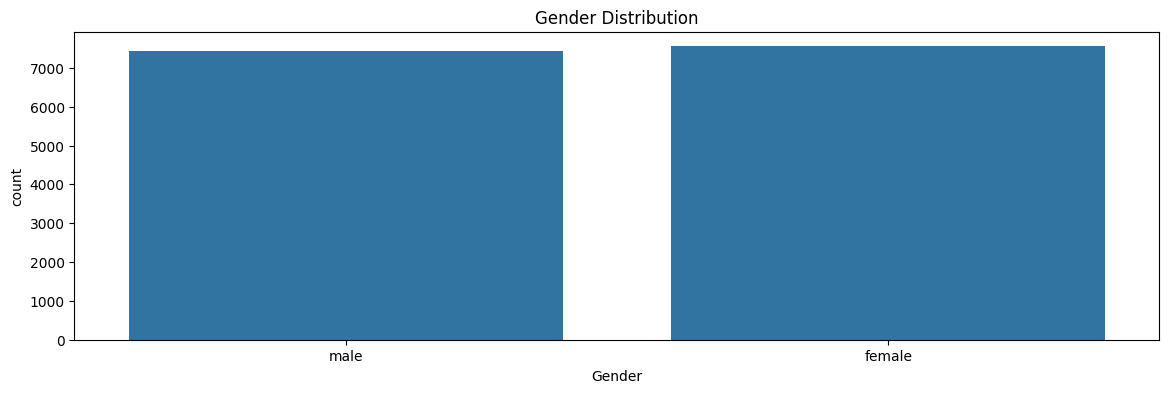

In [13]:
plt.figure(figsize=(14,4))
plt.title("Gender Distribution")
sns.countplot(data = df, x = "Gender")
plt.show()

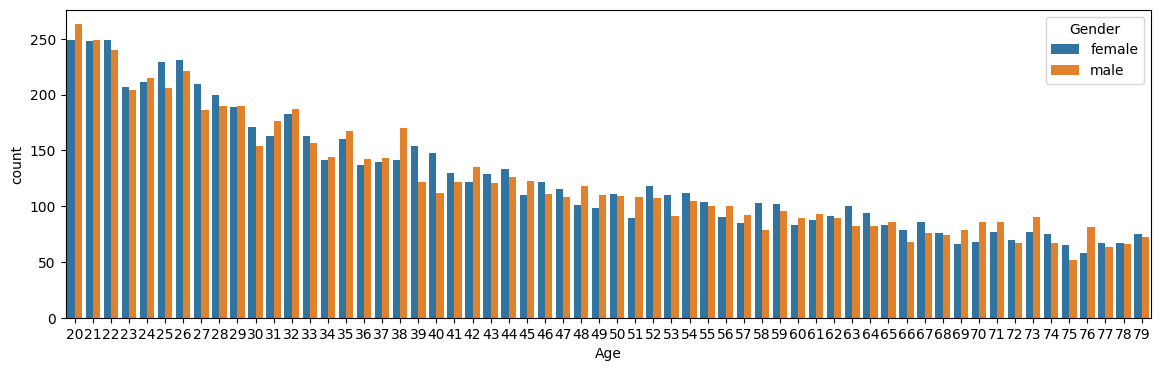

In [14]:
plt.figure(figsize=(14,4))
sns.countplot(data = df, x = "Age", hue = "Gender")
plt.show()

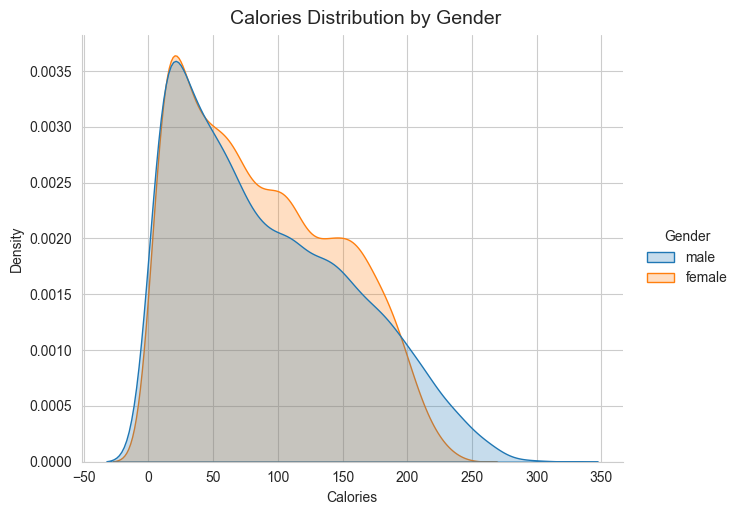

In [15]:
sns.set_style("whitegrid")

# KDE distribution plot
g = sns.displot(
    data=df,
    x="Calories",
    hue="Gender",
    kind="kde",
    fill=True,
    height=5,
    aspect=1.3,
)

# Add title
g.fig.suptitle("Calories Distribution by Gender", fontsize=14, y=1.02)

plt.xlabel("Calories")
plt.ylabel("Density")

plt.show()


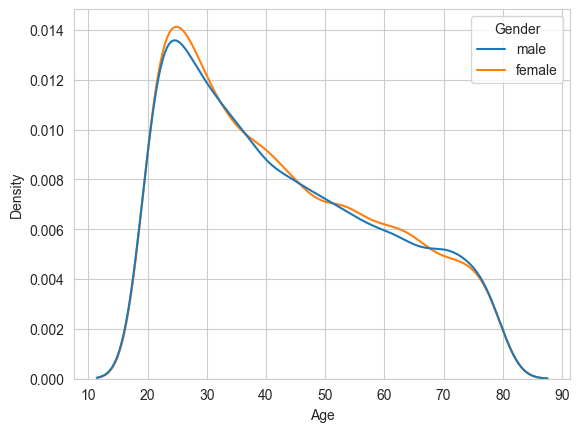

In [16]:
sns.kdeplot(data = df, x ="Age" , hue = "Gender")
plt.show()

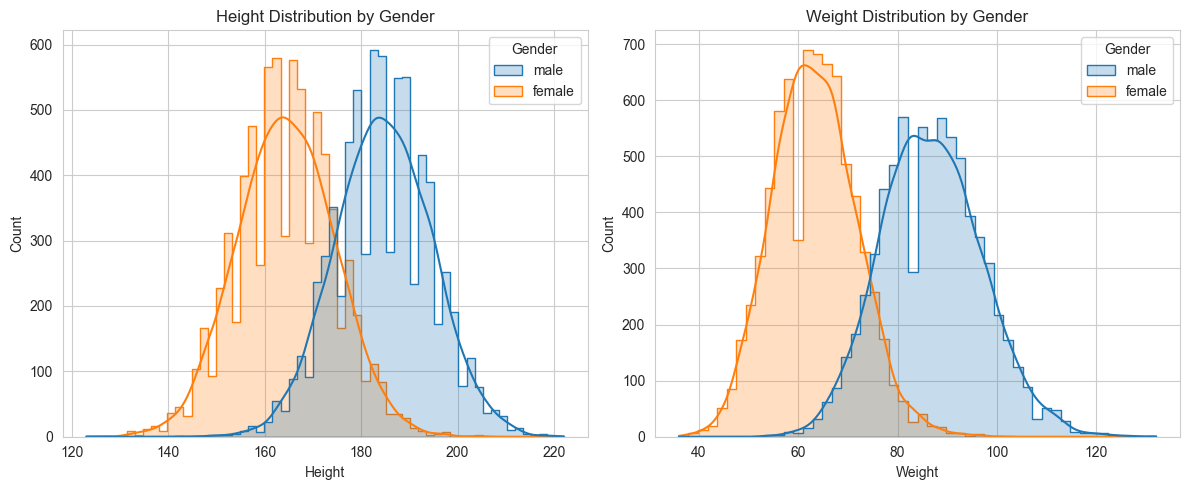

In [17]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,5))

# --- HEIGHT DISTRIBUTION ---
plt.subplot(1,2,1)
sns.histplot(data=df, x="Height", hue="Gender", kde=True, element="step")
plt.title("Height Distribution by Gender")
plt.xlabel("Height")
plt.ylabel("Count")

# --- WEIGHT DISTRIBUTION ---
plt.subplot(1,2,2)
sns.histplot(data=df, x="Weight", hue="Gender", kde=True, element="step")
plt.title("Weight Distribution by Gender")
plt.xlabel("Weight")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


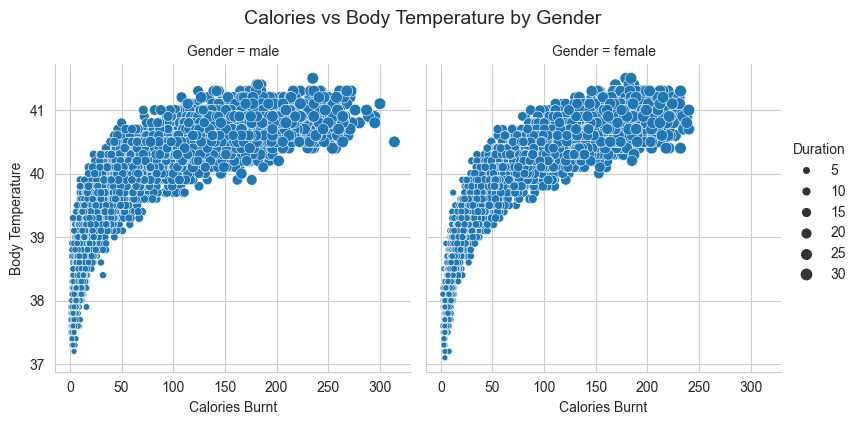

In [18]:
# Create the relplot
fig = sns.relplot(
    data=df,
    x="Calories",
    y="Body_Temp",
    col="Gender",
    size = "Duration",
    kind="scatter",
    height=4,
    aspect=1
)

# Add a main title
fig.fig.suptitle("Calories vs Body Temperature by Gender", fontsize=14, y=1.05)

# Add axis labels
fig.set_axis_labels("Calories Burnt", "Body Temperature")

plt.show()


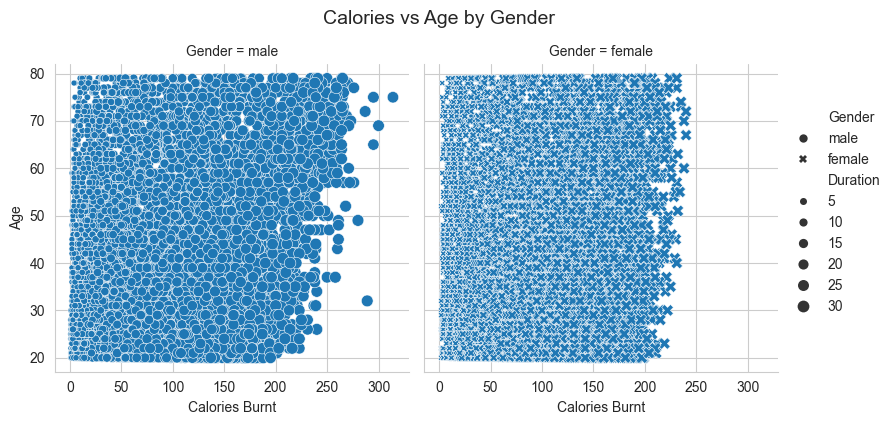

In [19]:

sns.set_style("whitegrid")

fig = sns.relplot(
    data=df,
    x="Calories",
    y="Age",
    col="Gender",
    size="Duration",
    style="Gender",     # Using an existing column
    kind="scatter",
    height=4,
    aspect=1
)

fig.fig.suptitle("Calories vs Age by Gender", fontsize=14, y=1.05)
fig.set_axis_labels("Calories Burnt", "Age")

plt.show()


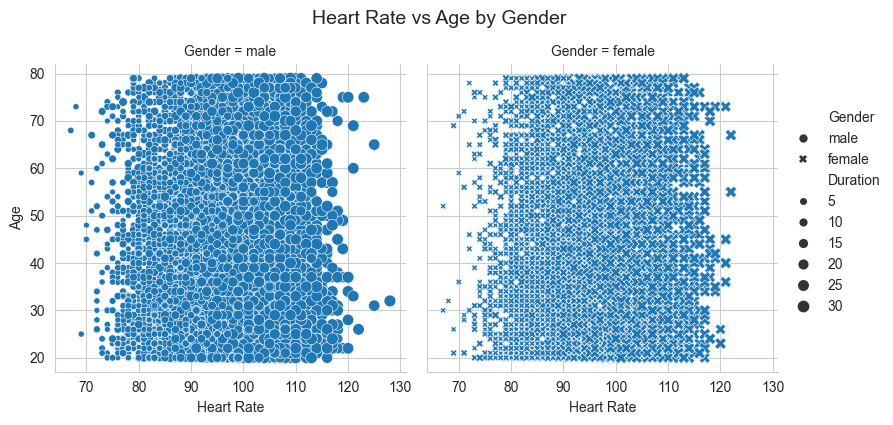

In [20]:

sns.set_style("whitegrid")

fig = sns.relplot(
    data=df,
    x="Heart_Rate",
    y="Age",
    col="Gender",
    size="Duration",
    style="Gender",     # Using an existing column
    kind="scatter",
    height=4,
    aspect=1
)

fig.fig.suptitle("Heart Rate vs Age by Gender", fontsize=14, y=1.05)
fig.set_axis_labels("Heart Rate", "Age")

plt.show()


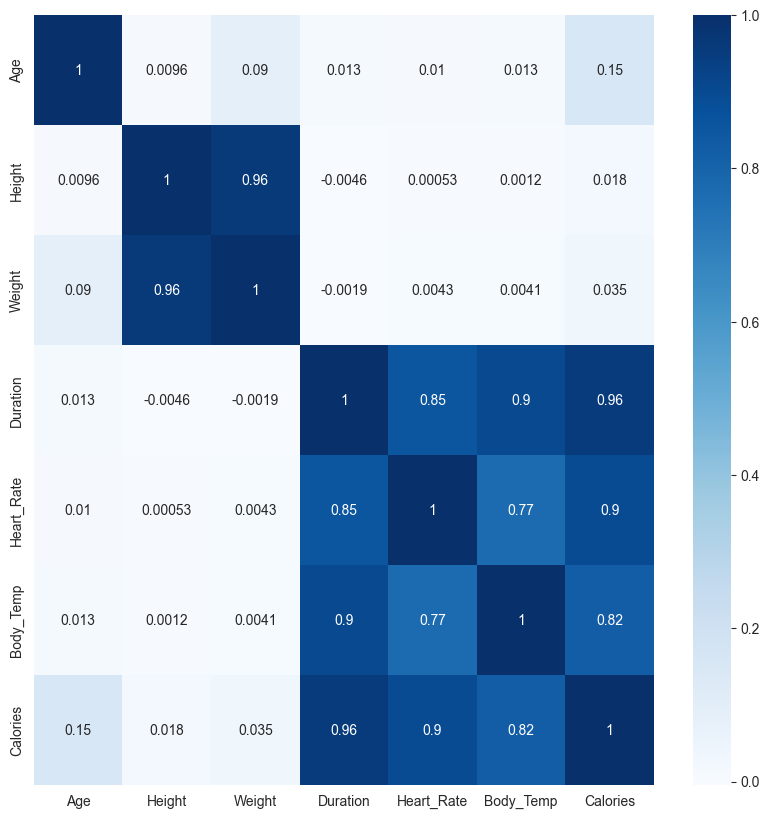

In [21]:
corr = df[df.describe().columns.drop("User_ID")].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap = 'Blues')
plt.show()

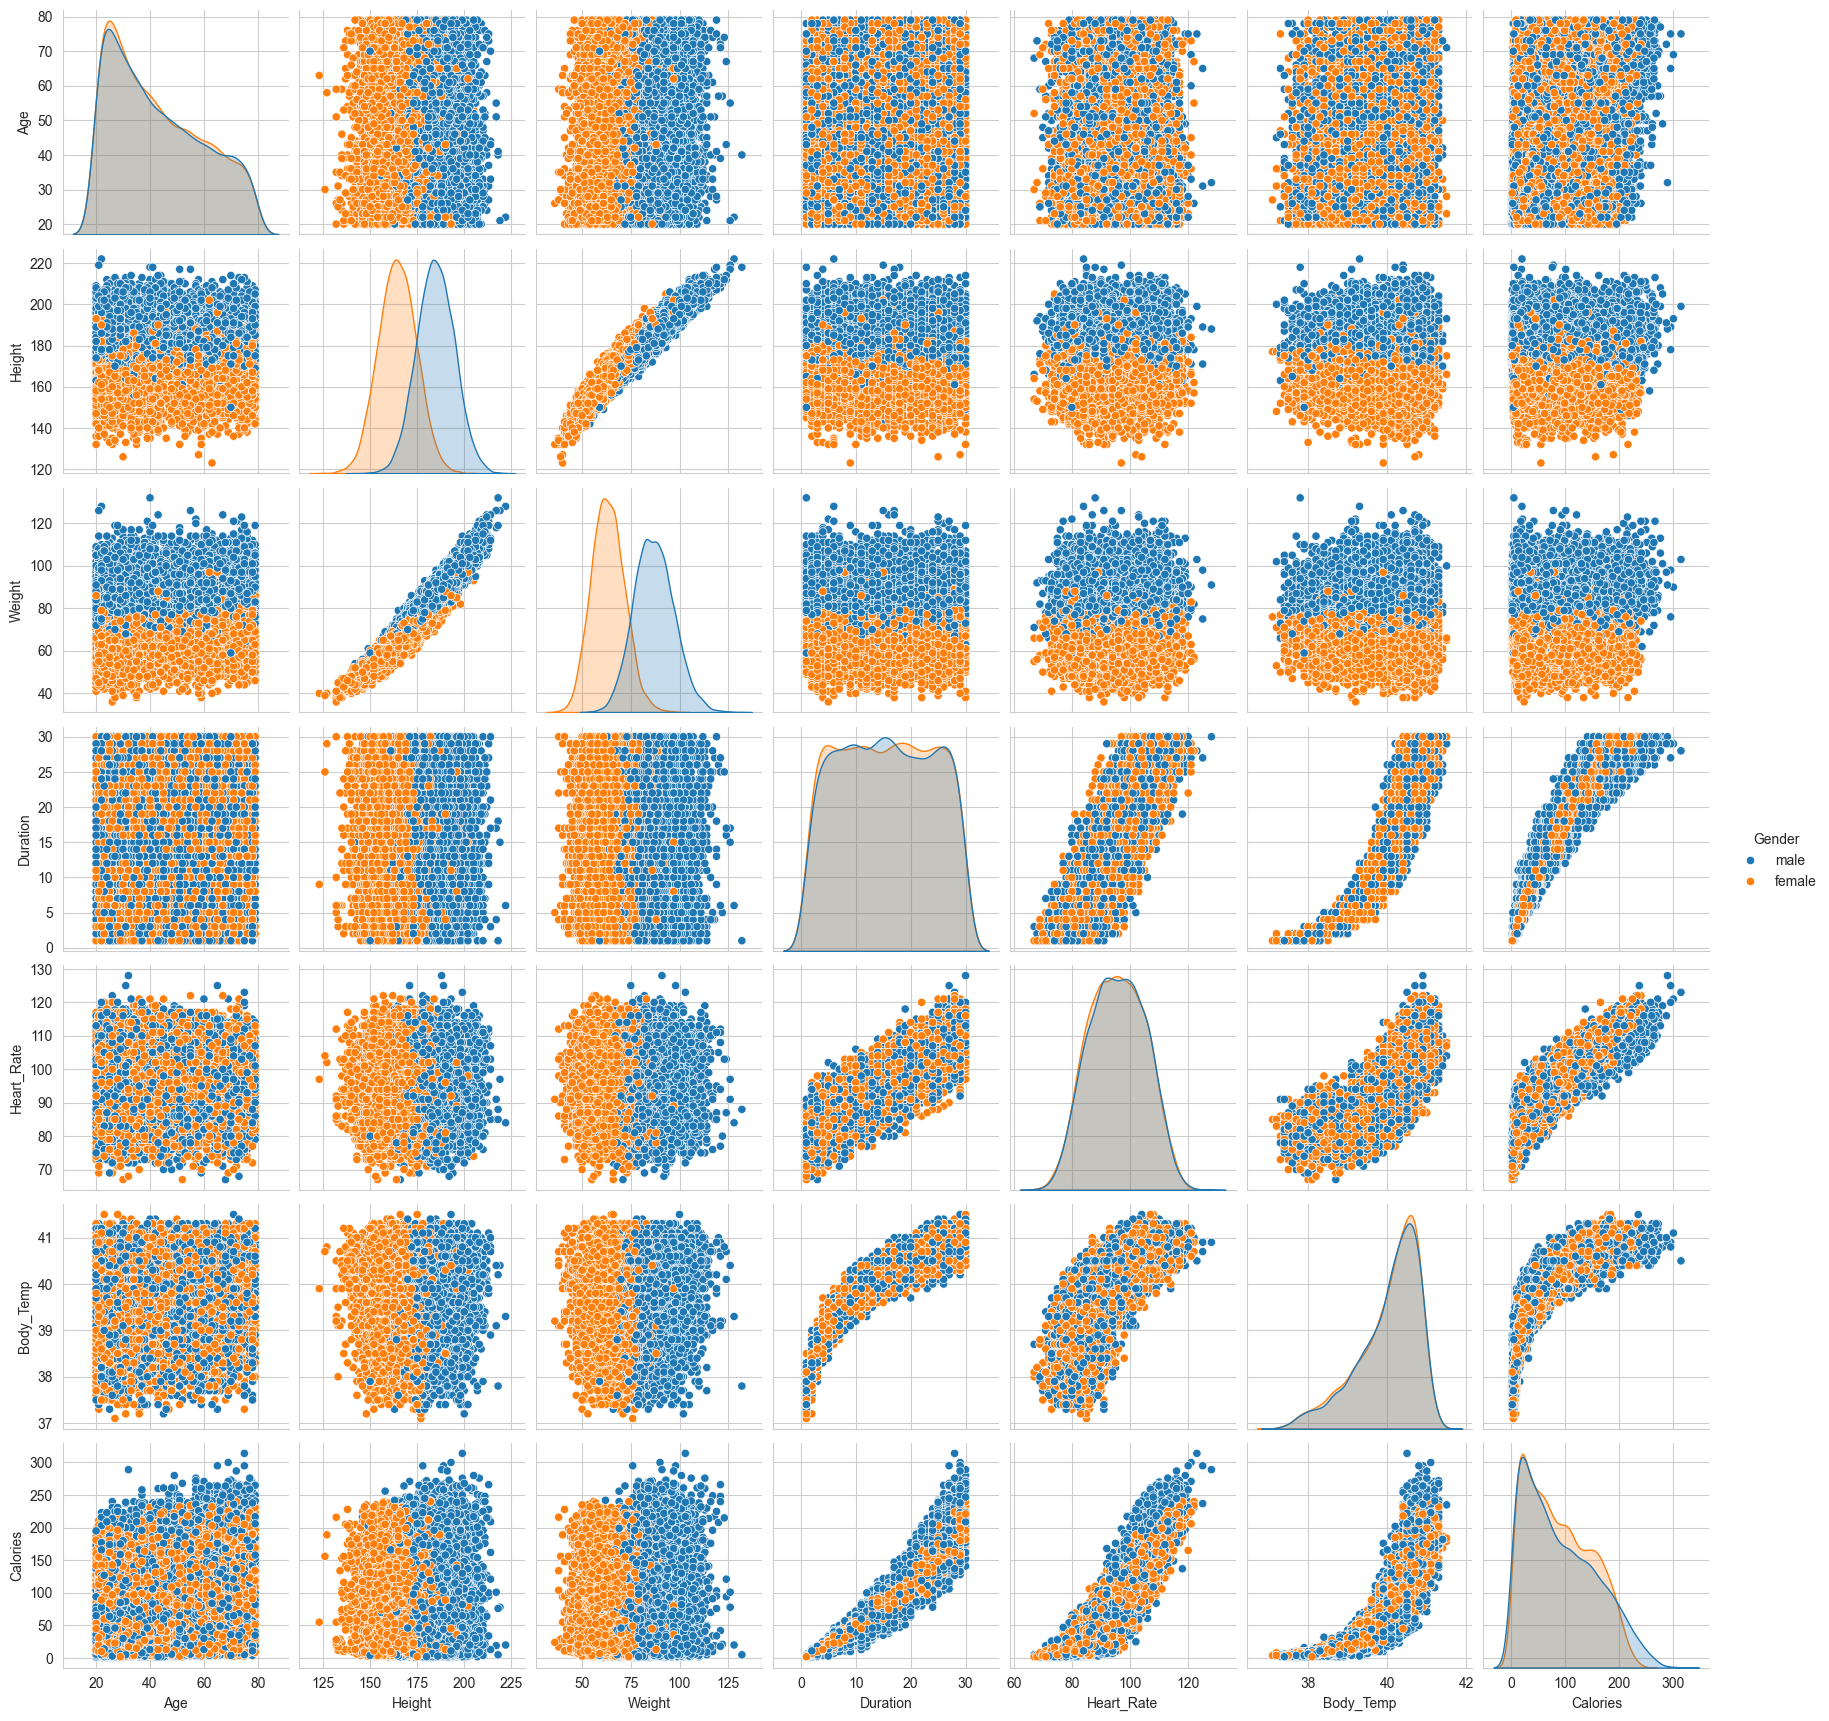

In [22]:
sns.pairplot(data = df.drop(columns="User_ID"), hue = "Gender")
plt.show()

In [23]:
#droping user id column
df = df.drop(columns="User_ID")
df.head()

Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    male   68   190.0    94.0      29.0       105.0       40.8     231.0
1  female   20   166.0    60.0      14.0        94.0       40.3      66.0
2    male   69   179.0    79.0       5.0        88.0       38.7      26.0
3  female   34   179.0    71.0      13.0       100.0       40.5      71.0
4  female   27   154.0    58.0      10.0        81.0       39.8      35.0

In [24]:
df["Gender"] = df["Gender"].replace({"male":1, "female":0})
df.Gender

C:\Users\Admin\AppData\Local\Temp\ipykernel_19928\3914420046.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"male":1, "female":0})


0        1
1        0
2        1
3        0
4        0
        ..
14995    0
14996    0
14997    0
14998    1
14999    1
Name: Gender, Length: 15000, dtype: int64

In [26]:
X = df.drop(columns="Calories")
y = df["Calories"]

In [27]:
print(X.shape)
print(y.shape)

(15000, 7)
(15000,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 7)
(3000, 7)
(12000,)
(3000,)


In [29]:
def score(ytest, ypred):
    print("MAE", metrics.mean_absolute_error(ytest, ypred))
    print("MSE", metrics.mean_squared_error(ytest, ypred))
    print("R2", metrics.r2_score(ytest, ypred))

### Creating model

In [30]:
#XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
score(y_test, y_pred)

MAE 1.451750299282372
MSE 4.373093022456942
R2 0.9988730448069097


In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
#RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_predrf = rf.predict(X_test)
score(y_test, y_predrf)

MAE 1.7515399999999999
MSE 7.9555648
R2 0.9979498343576765


In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
#KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_predknn = knn.predict(X_test)
score(y_test, y_predknn)

MAE 5.116733333333333
MSE 51.19993333333333
R2 0.9868056703894542


### Saving the model

In [35]:
import pickle

In [36]:
pickle.dump(xgbr, open('xgbr.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))